In [1]:
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import os
from keras.layers import Input, Dense, Lambda
from keras.models import Model

Using TensorFlow backend.


In [46]:
datapath = "E:\\Development Project\\Data\\GNPS Binned" #Absolute path for data.
datapath = "E:\\Development Project\\Code\\Masters-Autoencoder\\Sample Data"
numSamples = 100 
numFeatures = 2995
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.1

In [28]:
def rolling_window_filter(a):
    b = np.zeros([numFeatures, 1], float)
    #print("Start:")
    for i in range(len(a)):
        lowend = 0
        if i<50:
            lowend = i  # If there are fewer than 50 bins behind current windows, only go back to index 0.
        if i>=50:
            lowend = 50  # Else, go back 50 indices.
        #print(len(a[i-lowend:i+50]))
        comp = np.less(a[i], a[i-lowend:(i+50)])  # Compare current value to values for all bins in 100Da range
        # print(comp)
        if np.sum(comp)<7:  # If value is among top 6 in 100Da range, add it to final array b.
            b[i] = a[i]
        #if np.sum(comp)>93:
            # print(str(i) + ": " + str(np.sum(comp)))

    # Comparison prints of unfiltered and filtered arrays.
    # print(a.size)
    # print(a.shape)
    # print(np.amax(a))
    #print(np.count_nonzero(a))
    # print(b.size)
    # print(b.shape)
    # print(np.amax(b))
    #print(np.count_nonzero(b))
    return b

In [47]:
def load_data():
    data = np.zeros([numFeatures, 0], float)
    for file in os.listdir(datapath):
        if file.endswith(".txt"):
            print(file)
            min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
            filepath = os.path.join(datapath, file)
            temp = np.loadtxt(filepath, np.float64, usecols = 2) #U ses only the 3rd column, where intensities are stored.
            temp = temp.reshape(-1, 1)
            print(np.amax(temp))
            #temp = rolling_window_filter(temp)
            temp = min_max_scaler.fit_transform(temp)
            if np.amax(temp)<1.0: 
                print(np.amax(temp))
                plt.plot(temp, color='g')
                plt.show()
            if np.amin(temp>0):
                print(np.amin(temp))
            
            # temp = rolling_window_filter(temp)
            data = np.concatenate([data, temp], axis=1)

    print("Done")
    return data

In [20]:
def load_bin_values():
    for file in os.listdir(datapath):
        if file.endswith(".txt"):
            filepath = os.path.join(datapath, file)
            temp = np.loadtxt(filepath, np.float64, usecols=0)  # Grabs only the lower bound value for each bin
            temp = temp.reshape(-1, 1)
            temp = temp + 0.5  # Round values up to nearest integer.
            return temp  # End loop on first run, only need one batch of values.


CCMSLIB00000001548 binned.txt
109387080.0
CCMSLIB00000001549 binned.txt
32604272.0
CCMSLIB00000001550 binned.txt
43057184.0
CCMSLIB00000001555 binned.txt
367041.09
CCMSLIB00000001563 binned.txt
64301.03
0.9999999999999999


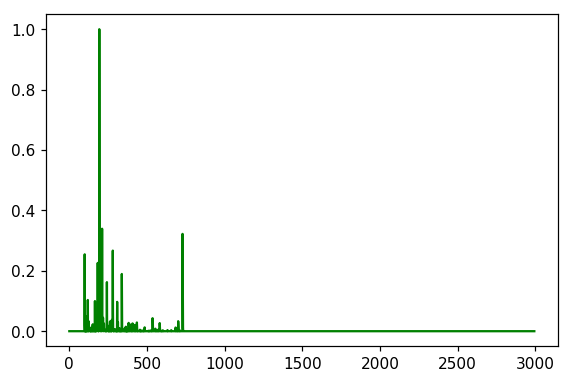

CCMSLIB00000001565 binned.txt
9896.4
CCMSLIB00000001566 binned.txt
20734.69
CCMSLIB00000001568 binned.txt
333.72
0.9999999999999999


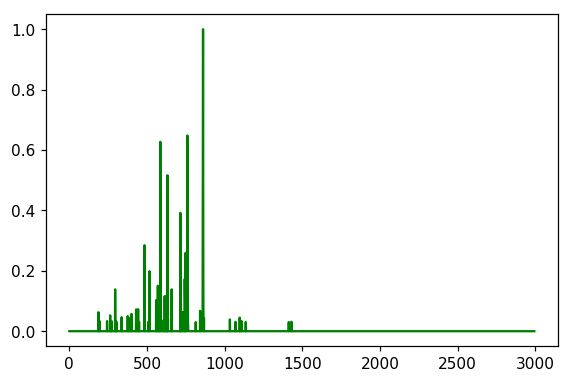

CCMSLIB00000001569 binned.txt
103564.98
CCMSLIB00000001570 binned.txt
811.76
CCMSLIB00000001572 binned.txt
1546.8
CCMSLIB00000001574 binned.txt
5483.52
CCMSLIB00000001576 binned.txt
10734.39
CCMSLIB00000001581 binned.txt
19181776.0
CCMSLIB00000001590 binned.txt
172760.3
CCMSLIB00000001598 binned.txt
8115.84
CCMSLIB00000001600 binned.txt
26551.12
CCMSLIB00000001601 binned.txt
5995577.0
0.9999999999999999


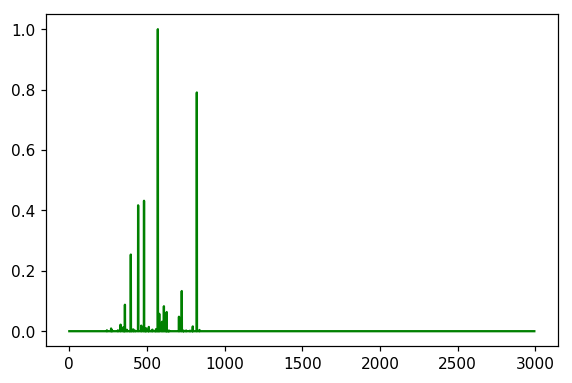

CCMSLIB00000001602 binned.txt
7592.63
0.9999999999999999


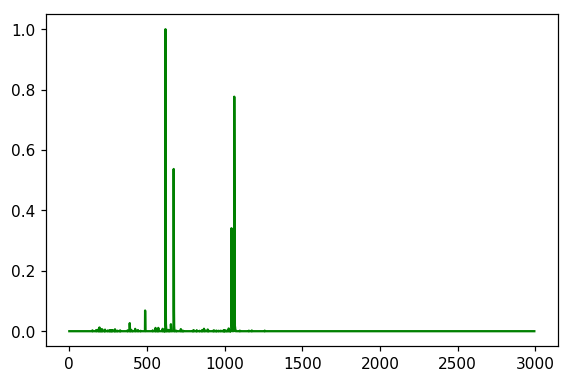

CCMSLIB00000001603 binned.txt
111843406.0
CCMSLIB00000001604 binned.txt
35997.72
CCMSLIB00000001606 binned.txt
154432.59
CCMSLIB00000001607 binned.txt
317436.59
CCMSLIB00000001608 binned.txt
64228456.0
CCMSLIB00000001609 binned.txt
1634.13
CCMSLIB00000001615 binned.txt
486.43
CCMSLIB00000001616 binned.txt
3114.98
CCMSLIB00000001617 binned.txt
120044.4
0.9999999999999999


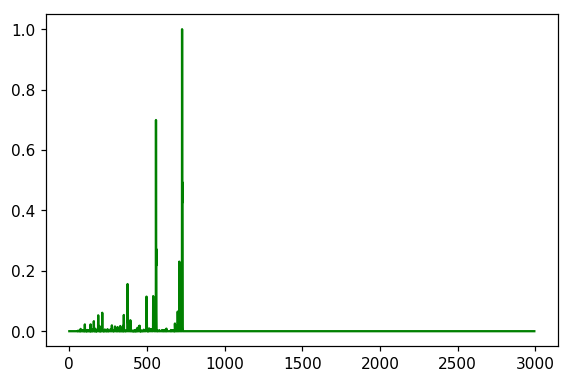

CCMSLIB00000001621 binned.txt
186817.91
CCMSLIB00000001622 binned.txt
171162.91
CCMSLIB00000001623 binned.txt
696121.19
CCMSLIB00000001624 binned.txt
6232.86
CCMSLIB00000001625 binned.txt
640243.38
CCMSLIB00000001631 binned.txt
164380.8
CCMSLIB00000001633 binned.txt
135754.41
CCMSLIB00000001634 binned.txt
5480920.0
CCMSLIB00000001635 binned.txt
20470.89
CCMSLIB00000001637 binned.txt
12700.95
CCMSLIB00000001638 binned.txt
8752910.0
CCMSLIB00000001641 binned.txt
12845.37
CCMSLIB00000001642 binned.txt
5234278.0
0.9999999999999999


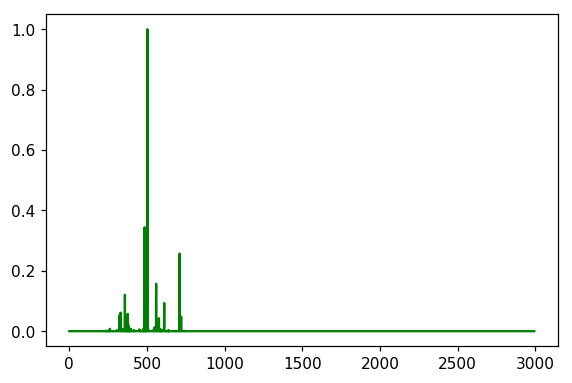

CCMSLIB00000001643 binned.txt
8174.73
CCMSLIB00000001645 binned.txt
23540.32
CCMSLIB00000001646 binned.txt
9859244.0
CCMSLIB00000001650 binned.txt
74985897.0
CCMSLIB00000001651 binned.txt
637.88
0.9999999999999999


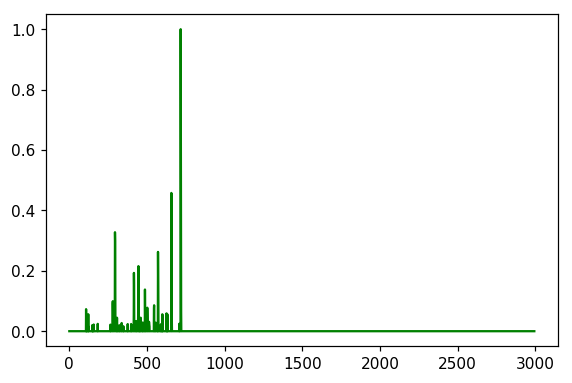

CCMSLIB00000001653 binned.txt
1217.61
CCMSLIB00000001655 binned.txt
2021.29
0.9999999999999999


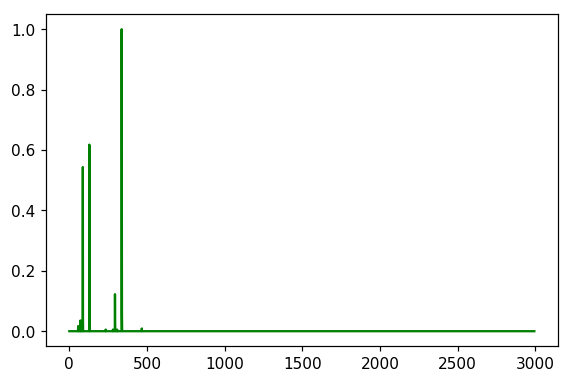

CCMSLIB00000001673 binned.txt
4490.56
CCMSLIB00000001676 binned.txt
23910.69
CCMSLIB00000001678 binned.txt
8176.94
CCMSLIB00000001680 binned.txt
1827.32
CCMSLIB00000001682 binned.txt
2428.78
CCMSLIB00000001702 binned.txt
11213482.0
CCMSLIB00000001707 binned.txt
2292710.0
CCMSLIB00000001711 binned.txt
67812013.0
CCMSLIB00000001712 binned.txt
295991488.0
CCMSLIB00000001715 binned.txt
25125448.0
0.9999999999999999


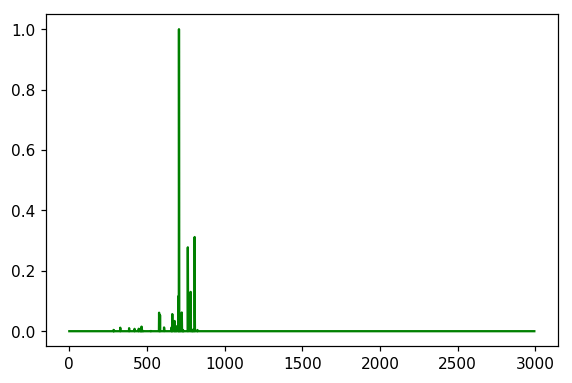

CCMSLIB00000001729 binned.txt
15342980.0
CCMSLIB00000001730 binned.txt
18534656.0
CCMSLIB00000001754 binned.txt
14596656.0
CCMSLIB00000001756 binned.txt
82638584.0
CCMSLIB00000001757 binned.txt
13099768.0
CCMSLIB00000001759 binned.txt
8247035.0
CCMSLIB00000001760 binned.txt
4282866.0
CCMSLIB00000001761 binned.txt
4948748.0
CCMSLIB00000001776 binned.txt
87530592.0
CCMSLIB00000001777 binned.txt
266457920.0
CCMSLIB00000001778 binned.txt
14096592.0
CCMSLIB00000001784 binned.txt
32900992.0
CCMSLIB00000001785 binned.txt
10124.0
CCMSLIB00000001786 binned.txt
35241328.0
CCMSLIB00000001790 binned.txt
507026.0
CCMSLIB00000001791 binned.txt
9111149.0
CCMSLIB00000001798 binned.txt
228700096.0
CCMSLIB00000001799 binned.txt
812085.0
CCMSLIB00000001800 binned.txt
3708640.0
CCMSLIB00000001803 binned.txt
12595312.0
CCMSLIB00000001810 binned.txt
191350.0
CCMSLIB00000001811 binned.txt
1825712.0
CCMSLIB00000001812 binned.txt
4024405.0
CCMSLIB00000001813 binned.txt
2228327.0
CCMSLIB00000001814 binned.txt
4

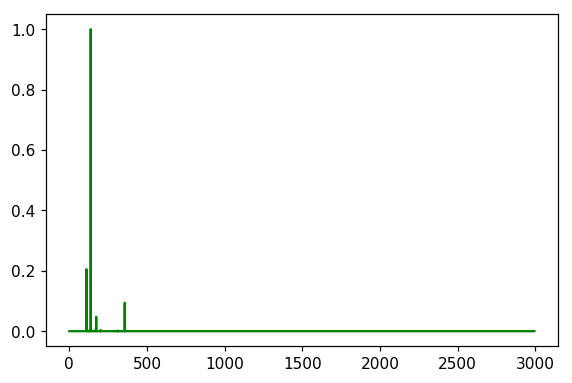

CCMSLIB00000004250 binned.txt
26467.14
CCMSLIB00000004253 binned.txt
117740.28
CCMSLIB00000004256 binned.txt
18245.2
CCMSLIB00000004259 binned.txt
497447.86
CCMSLIB00000004265 binned.txt
1799763.86
CCMSLIB00000004274 binned.txt
280981.47
CCMSLIB00000004277 binned.txt
45939.07
CCMSLIB00000004280 binned.txt
3890.39
CCMSLIB00000004283 binned.txt
274932.91
CCMSLIB00000004304 binned.txt
59481.81
CCMSLIB00000004307 binned.txt
25851.16
CCMSLIB00000004310 binned.txt
1328.07
CCMSLIB00000004313 binned.txt
74550.79
0.9999999999999999


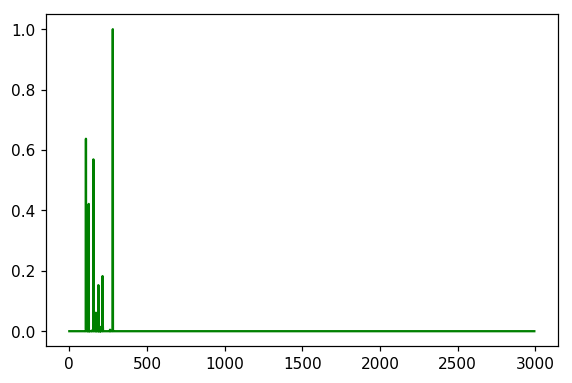

CCMSLIB00000004319 binned.txt
2005.15
0.9999999999999999


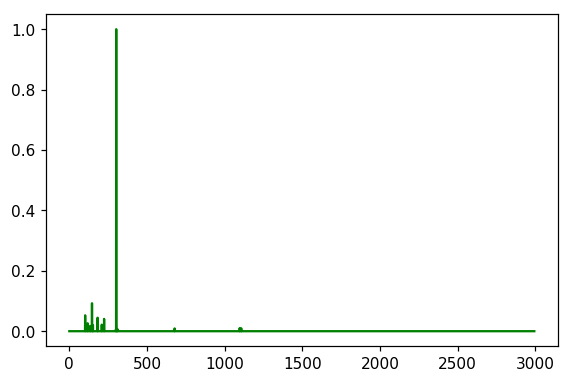

CCMSLIB00000004322 binned.txt
521.2
Done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2995, 100)
float64


In [48]:
main = load_data()
labels = load_bin_values()

print(main)
print(main.shape)
print(main.dtype)


In [61]:
print(main)
print(main.shape)
print(main.dtype)
print(np.amax(main))
print(np.amin(main))
print(main.shape[0])
print(main[1,].shape)
for row in range(main.shape[0]):
    print(str(row))
    if np.amax(main[row],)>1:
        print(str(row) + " exceeds maximum allowed value")
    print(np.amax(main[row,]))            

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2995, 100)
float64
1.0
0.0
2995
(100,)
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
10
0.0
11
0.0
12
0.0
13
0.0
14
0.0
15
0.0
16
0.0
17
0.0
18
0.0
19
0.0
20
0.0
21
0.0
22
0.0
23
0.0
24
0.0
25
0.0
26
0.0
27
0.0
28
0.0
29
0.0
30
0.0
31
0.0
32
0.0
33
0.0
34
0.0
35
0.0
36
0.0
37
0.0
38
0.0
39
0.0
40
0.0
41
0.0
42
0.0
43
0.0
44
0.0
45
0.0
46
0.0
47
0.0
48
0.0
49
0.0
50
0.04152619845439654
51
0.0014604483950248224
52
0.03966098290668155
53
0.004010783652008467
54
0.4348407247124839
55
0.02695134511501031
56
0.09561733138087887
57
0.01694462447249034
58
0.043582670074153625
59
0.007582637388308125
60
0.00945243305564573
61
0.0009123910015826714
62
0.0013491745226912803
63
0.0
64
0.055237023145304494
65
0.004820413892320735
66
0.5703915107155341
67
0.04261613328382133
68
0.2927303767816731
69
0.029996800403569533
70
0.170437

942
0.0011702766870721425
943
0.0
944
0.12995079146895014
945
4.110530521511228e-07
946
0.2633745701755251
947
0.004020306608334139
948
0.0
949
0.0016726746858466695
950
1.0
951
0.020310786506551617
952
0.0004372546211453941
953
0.00013246451756341563
954
0.01314457315547245
955
2.3818385761305478e-07
956
0.006706384089572375
957
0.0
958
0.005779372515742366
959
0.00016555140415499775
960
0.0010302245787956663
961
0.0
962
0.7221129277829114
963
9.378860473248119e-05
964
0.0
965
8.405687045614146e-05
966
0.0035794161909620944
967
0.012988724084726984
968
0.012035608409732024
969
0.00045987298823317493
970
0.0037086020576544672
971
0.0
972
0.5070960088392849
973
0.00022827146162792355
974
0.0
975
0.0017135037529815095
976
0.0014975048171713883
977
0.0
978
0.0028474880177640697
979
1.465480221384408e-05
980
3.796609184051512e-05
981
0.0
982
0.0
983
0.0
984
0.0
985
0.0
986
0.014899273634507824
987
0.0
988
0.0
989
0.0006733457654721058
990
0.3112067585890905
991
1.986756418730427e-06
992
0.

0.0
1859
0.0
1860
0.0
1861
0.0
1862
0.0
1863
0.0
1864
0.0
1865
0.0
1866
0.0
1867
0.0
1868
0.0
1869
0.0
1870
0.0
1871
0.0
1872
0.0
1873
0.0
1874
0.0
1875
0.0
1876
0.0
1877
0.0
1878
0.0
1879
0.0
1880
0.0
1881
0.0
1882
0.0
1883
0.0
1884
0.0
1885
0.0
1886
0.0
1887
0.0
1888
0.0
1889
0.0
1890
0.0
1891
0.0
1892
0.0
1893
0.0
1894
0.0
1895
0.0
1896
0.0
1897
0.0
1898
0.0
1899
0.0
1900
0.0
1901
0.0
1902
0.0
1903
0.0
1904
0.0
1905
0.0
1906
0.0
1907
0.0
1908
0.0
1909
0.0
1910
0.0
1911
0.0
1912
0.0
1913
0.0
1914
0.0
1915
0.0
1916
0.0
1917
0.0
1918
0.0
1919
0.0
1920
0.0
1921
0.0
1922
0.0
1923
0.0
1924
0.0
1925
0.0
1926
0.0
1927
0.0
1928
0.0
1929
0.0
1930
0.0
1931
0.0
1932
0.0
1933
0.0
1934
0.0
1935
0.0
1936
0.0
1937
0.0
1938
0.0
1939
0.0
1940
0.0
1941
0.0
1942
0.0
1943
0.0
1944
0.0
1945
0.0
1946
0.0
1947
0.0
1948
0.0
1949
0.0
1950
0.0
1951
0.0
1952
0.0
1953
0.0
1954
0.0
1955
0.0
1956
0.0
1957
0.0
1958
0.0
1959
0.0
1960
0.0
1961
0.0
1962
0.0
1963
0.0
1964
0.0
1965
0.0
1966
0.0
1967
0.0
1968
0.0
1969
0

[0 0 0 ... 0 0 0]
(2995,)
35


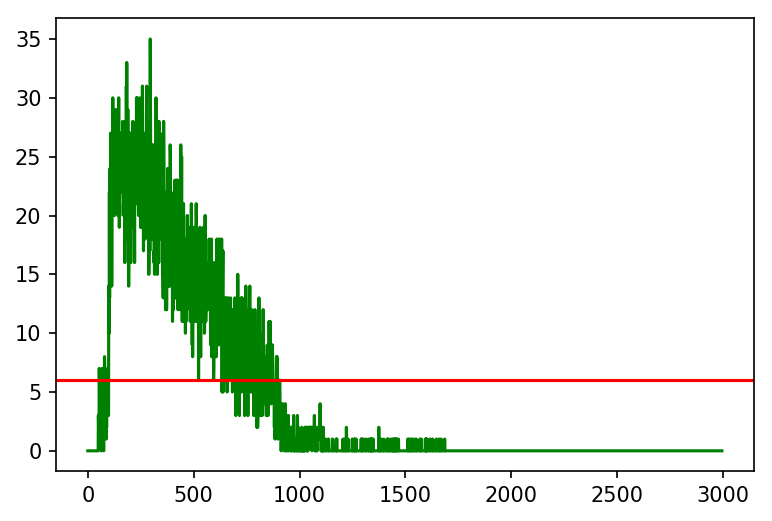

Number of bins with only 0s: 1923
Number of bins with 1 non-zero: 164
Total number of bins with fewer than 6 non-zero values:2250


array([   0,    1,    2, ..., 2992, 2993, 2994], dtype=int64)

In [45]:
nonzeros = (np.count_nonzero(main, axis =1)) #Get count of non-zeros values for all bins.

print(nonzeros)
print(nonzeros.shape)
print(np.amax(nonzeros)) #Highest number of non-zeros out of all bins.

plt.plot(nonzeros, color = 'g')
plt.axhline(y = 6, color = 'r')
plt.show()

print("Number of bins with only 0s: " + str(len(np.where(nonzeros==0)[0])))

print("Number of bins with 1 non-zero: " + str(len(np.where(nonzeros==1)[0])))

print("Total number of bins with fewer than 6 non-zero values:" + str(len(np.where(nonzeros<6)[0])))

np.where(nonzeros<6)[0] #Indices of bins with <6 non-zero values.

In [9]:
testmain = main #Keep copy of untrimmed matrix, just in case.
testmain = np.delete(testmain, np.where(nonzeros<6)[0], axis = 0) #Remove features that have <6 non-zeros values.
print(testmain.shape)

nzero = (np.count_nonzero(testmain, axis =1))
print(len(np.where(nzero<6)[0])) #Verify that all <6 non-zero features were removed. Should output 0.

(1960, 5770)
0


In [10]:
maxVals = np.amax(testmain, axis=1) #Get max values for each feature.
print(maxVals[:10])
print(maxVals.shape)
print(len(np.where(maxVals<0.05)[0])) #Output number of bins with max value <0.05.
testmain = np.delete(testmain, np.where(maxVals<0.05)[0], axis=0) #Remove features that have max value <0.05
print(testmain.shape)
numFeatures = testmain.shape[0] #Update feature number variable

maxValsVerify = (np.amax(testmain, axis = 1))
print(len(np.where(maxValsVerify<0.05)[0])) #Verify said features have been removed.

[0.24705882 0.33043478 0.44819277 0.28177413 0.30429293 0.38986209
 0.29345794 0.35903614 0.61073434 0.38770686]
(1960,)
282
(1678, 5770)
0


In [11]:
print(testmain.shape)

(1678, 5770)


In [12]:
def basic_autoencoder(x_train, x_val, epochs=100, encoded_dim=10):
    # inputLayer = Input(shape=x_train.shape) #This line brings up this error: expected input_4 to have 3 dimensions, but got array with shape (600, 100)
    inputLayer = Input(shape=(x_train.shape[1],))  # fixed

    l = inputLayer
    l = Dense(256, activation='relu')(l)
    l = Dense(128, activation='relu')(l)
    l = Dense(16, activation='relu')(l)
    l = Dense(encoded_dim)(l)

    latent_space = l

    l2 = Dense(16, activation='relu')(l)
    l2 = Dense(128, activation='relu')(l2)
    l2 = Dense(256, activation='relu')(l2)
    l2 = Dense(1678, activation='sigmoid')(l2)

    out_layer = l2

    auto_model = Model(input=inputLayer, outputs=out_layer)

    auto_model.compile(loss='mean_squared_error', optimizer='sgd')

    # Fixed this line: added x_train again: you need to give it the targets! Also removed the batch stuff
    autoencoder_train = auto_model.fit(x_train, x_train, shuffle=False, epochs=epochs, validation_data=(x_val, x_val))
     
    return autoencoder_train
    

In [13]:
def plot_loss(fitted_model, train_data, val_data, epochs):
    loss = fitted_model.history['loss']
    val_loss = fitted_model.history['val_loss']
    epochs = range(epochs)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, loss,'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    #plt.figure()
    #embedding = fitted_model.predict(train_data)
    #plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', cmap="viridis")
    #plt.show()
    
    #plt.figure()
    #embedding = fitted_model.predict(val_data)
    #plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', cmap="viridis")
    #plt.show()

(4770, 1678)
(1678,)
1678
(999, 1678)
(1678,)
1678


c:\users\matej\envs\masters\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


Train on 4770 samples, validate on 999 samples
Epoch 1/1000
4770/4770 [==============================] - 2s 507us/step - loss: 0.2466 - val_loss: 0.2483
Epoch 2/1000
4770/4770 [==============================] - 2s 501us/step - loss: 0.2466 - val_loss: 0.2482
Epoch 3/1000
4770/4770 [==============================] - 2s 442us/step - loss: 0.2465 - val_loss: 0.2482
Epoch 4/1000
4770/4770 [==============================] - 2s 513us/step - loss: 0.2464 - val_loss: 0.2481
Epoch 5/1000
4770/4770 [==============================] - 2s 414us/step - loss: 0.2464 - val_loss: 0.2480
Epoch 6/1000
4770/4770 [==============================] - 3s 529us/step - loss: 0.2463 - val_loss: 0.2480
Epoch 7/1000
4770/4770 [==============================] - 3s 717us/step - loss: 0.2463 - val_loss: 0.2479
Epoch 8/1000
4770/4770 [==============================] - 3s 595us/step - loss: 0.2462 - val_loss: 0.2478
Epoch 9/1000
4770/4770 [==============================] - 3s 614us/step - loss: 0.2461 - val_loss: 0.2478

4770/4770 [==============================] - 2s 449us/step - loss: 0.2418 - val_loss: 0.2434
Epoch 78/1000
4770/4770 [==============================] - 2s 405us/step - loss: 0.2417 - val_loss: 0.2433
Epoch 79/1000
4770/4770 [==============================] - 2s 402us/step - loss: 0.2416 - val_loss: 0.2432
Epoch 80/1000
4770/4770 [==============================] - 2s 397us/step - loss: 0.2415 - val_loss: 0.2432
Epoch 81/1000
4770/4770 [==============================] - 2s 454us/step - loss: 0.2415 - val_loss: 0.2431
Epoch 82/1000
4770/4770 [==============================] - 2s 405us/step - loss: 0.2414 - val_loss: 0.2430
Epoch 83/1000
4770/4770 [==============================] - 2s 407us/step - loss: 0.2413 - val_loss: 0.2429
Epoch 84/1000
4770/4770 [==============================] - 2s 403us/step - loss: 0.2412 - val_loss: 0.2429
Epoch 85/1000
4770/4770 [==============================] - 2s 404us/step - loss: 0.2412 - val_loss: 0.2428
Epoch 86/1000
4770/4770 [==========================

4770/4770 [==============================] - 2s 425us/step - loss: 0.2317 - val_loss: 0.2331
Epoch 154/1000
4770/4770 [==============================] - 2s 401us/step - loss: 0.2313 - val_loss: 0.2328
Epoch 155/1000
4770/4770 [==============================] - 2s 402us/step - loss: 0.2310 - val_loss: 0.2324
Epoch 156/1000
4770/4770 [==============================] - 2s 402us/step - loss: 0.2306 - val_loss: 0.2320
Epoch 157/1000
4770/4770 [==============================] - 2s 420us/step - loss: 0.2301 - val_loss: 0.2316
Epoch 158/1000
4770/4770 [==============================] - 2s 432us/step - loss: 0.2297 - val_loss: 0.2311
Epoch 159/1000
4770/4770 [==============================] - 2s 426us/step - loss: 0.2292 - val_loss: 0.2306
Epoch 160/1000
4770/4770 [==============================] - 2s 434us/step - loss: 0.2287 - val_loss: 0.2301
Epoch 161/1000
4770/4770 [==============================] - 2s 455us/step - loss: 0.2282 - val_loss: 0.2295
Epoch 162/1000
4770/4770 [=================

Epoch 229/1000
4770/4770 [==============================] - 2s 413us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 230/1000
4770/4770 [==============================] - 2s 396us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 231/1000
4770/4770 [==============================] - 2s 430us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 232/1000
4770/4770 [==============================] - 2s 431us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 233/1000
4770/4770 [==============================] - 2s 491us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 234/1000
4770/4770 [==============================] - 2s 488us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 235/1000
4770/4770 [==============================] - 2s 437us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 236/1000
4770/4770 [==============================] - 2s 412us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 237/1000
4770/4770 [==============================] - 2s 401us/step - loss: 0.0015 - val_loss: 0.0014
Epoch 238/1000
4770/4770 [==

Epoch 305/1000
4770/4770 [==============================] - 2s 399us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 306/1000
4770/4770 [==============================] - 2s 401us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 307/1000
4770/4770 [==============================] - 2s 407us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 308/1000
4770/4770 [==============================] - 2s 403us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 309/1000
4770/4770 [==============================] - 2s 402us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 310/1000
4770/4770 [==============================] - 2s 400us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 311/1000
4770/4770 [==============================] - 2s 403us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 312/1000
4770/4770 [==============================] - 2s 394us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 313/1000
4770/4770 [==============================] - 2s 395us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 314/1000
4770/4770 [==

Epoch 381/1000
4770/4770 [==============================] - 2s 410us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 382/1000
4770/4770 [==============================] - 2s 416us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 383/1000
4770/4770 [==============================] - 2s 397us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 384/1000
4770/4770 [==============================] - 2s 404us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 385/1000
4770/4770 [==============================] - 2s 400us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 386/1000
4770/4770 [==============================] - 2s 405us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 387/1000
4770/4770 [==============================] - 2s 407us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 388/1000
4770/4770 [==============================] - 2s 397us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 389/1000
4770/4770 [==============================] - 2s 409us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 390/1000
4770/4770 [==

Epoch 457/1000
4770/4770 [==============================] - 2s 420us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 458/1000
4770/4770 [==============================] - 2s 430us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 459/1000
4770/4770 [==============================] - 2s 479us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 460/1000
4770/4770 [==============================] - 2s 485us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 461/1000
4770/4770 [==============================] - 2s 451us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 462/1000
4770/4770 [==============================] - 2s 487us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 463/1000
4770/4770 [==============================] - 2s 519us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 464/1000
4770/4770 [==============================] - 2s 471us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 465/1000
4770/4770 [==============================] - 2s 461us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 466/1000
4770/4770 [==

4770/4770 [==============================] - 3s 603us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 533/1000
4770/4770 [==============================] - 4s 760us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 534/1000
4770/4770 [==============================] - 3s 671us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 535/1000
4770/4770 [==============================] - 3s 707us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 536/1000
4770/4770 [==============================] - 4s 744us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 537/1000
4770/4770 [==============================] - 3s 674us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 538/1000
4770/4770 [==============================] - 3s 532us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 539/1000
4770/4770 [==============================] - 2s 499us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 540/1000
4770/4770 [==============================] - 2s 437us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 541/1000
4770/4770 [=================

Epoch 608/1000
4770/4770 [==============================] - 2s 423us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 609/1000
4770/4770 [==============================] - 2s 475us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 610/1000
4770/4770 [==============================] - 3s 590us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 611/1000
4770/4770 [==============================] - 3s 594us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 612/1000
4770/4770 [==============================] - 2s 523us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 613/1000
4770/4770 [==============================] - 2s 480us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 614/1000
4770/4770 [==============================] - 2s 451us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 615/1000
4770/4770 [==============================] - 2s 410us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 616/1000
4770/4770 [==============================] - 2s 411us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 617/1000
4770/4770 [==

Epoch 684/1000
4770/4770 [==============================] - 2s 408us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 685/1000
4770/4770 [==============================] - 2s 401us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 686/1000
4770/4770 [==============================] - 2s 401us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 687/1000
4770/4770 [==============================] - 2s 409us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 688/1000
4770/4770 [==============================] - 2s 411us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 689/1000
4770/4770 [==============================] - 2s 402us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 690/1000
4770/4770 [==============================] - 2s 399us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 691/1000
4770/4770 [==============================] - 2s 403us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 692/1000
4770/4770 [==============================] - 2s 402us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 693/1000
4770/4770 [==

Epoch 760/1000
4770/4770 [==============================] - 2s 457us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 761/1000
4770/4770 [==============================] - 2s 453us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 762/1000
4770/4770 [==============================] - 2s 448us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 763/1000
4770/4770 [==============================] - 2s 444us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 764/1000
4770/4770 [==============================] - 2s 444us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 765/1000
4770/4770 [==============================] - 2s 441us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 766/1000
4770/4770 [==============================] - 2s 445us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 767/1000
4770/4770 [==============================] - 2s 447us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 768/1000
4770/4770 [==============================] - 2s 444us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 769/1000
4770/4770 [==

Epoch 836/1000
4770/4770 [==============================] - 2s 447us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 837/1000
4770/4770 [==============================] - 2s 492us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 838/1000
4770/4770 [==============================] - 2s 488us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 839/1000
4770/4770 [==============================] - 3s 657us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 840/1000
4770/4770 [==============================] - 3s 578us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 841/1000
4770/4770 [==============================] - 3s 619us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 842/1000
4770/4770 [==============================] - 2s 513us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 843/1000
4770/4770 [==============================] - 2s 411us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 844/1000
4770/4770 [==============================] - 2s 507us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 845/1000
4770/4770 [==

4770/4770 [==============================] - 2s 433us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 912/1000
4770/4770 [==============================] - 2s 432us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 913/1000
4770/4770 [==============================] - 2s 417us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 914/1000
4770/4770 [==============================] - 2s 447us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 915/1000
4770/4770 [==============================] - 2s 416us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 916/1000
4770/4770 [==============================] - 2s 419us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 917/1000
4770/4770 [==============================] - 2s 413us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 918/1000
4770/4770 [==============================] - 2s 419us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 919/1000
4770/4770 [==============================] - 2s 402us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 920/1000
4770/4770 [=================

Epoch 987/1000
4770/4770 [==============================] - 2s 409us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 988/1000
4770/4770 [==============================] - 2s 402us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 989/1000
4770/4770 [==============================] - 2s 435us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 990/1000
4770/4770 [==============================] - 2s 410us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 991/1000
4770/4770 [==============================] - 2s 463us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 992/1000
4770/4770 [==============================] - 2s 511us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 993/1000
4770/4770 [==============================] - 3s 538us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 994/1000
4770/4770 [==============================] - 2s 476us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 995/1000
4770/4770 [==============================] - 2s 475us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 996/1000
4770/4770 [==

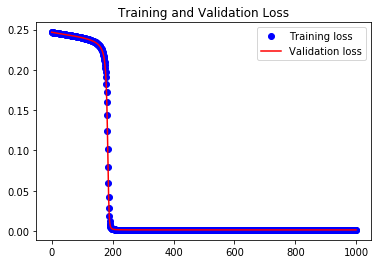

In [15]:
x_train = testmain
# x_train = x_train.reshape((1, -1))
x_train = x_train.transpose()  # transpose so that axis 0 is samples.
x_val = x_train[4771:]
x_train = x_train[:4770]
    
print(x_train.shape)
print(x_train[0].shape)
print(x_train.shape[1])
print(x_val.shape)
print(x_val[0].shape)
print(x_val.shape[1])

epochs1 = 1000
epochs2 = 200
epochs3 = 500

enc1 = basic_autoencoder(x_train, x_val, epochs=epochs1, encoded_dim=10)
plot_loss(enc1, x_train, x_val, epochs1)

#enc2 = basic_autoencoder(x_train, x_val, epochs=epochs2, encoded_dim=10)
#plot_loss(enc2, x_train, x_val, epochs2)

#enc3 = basic_autoencoder(x_train, x_val, epochs=epochs3, encoded_dim=10)
#plot_loss(enc3, x_train, x_val, epochs3)


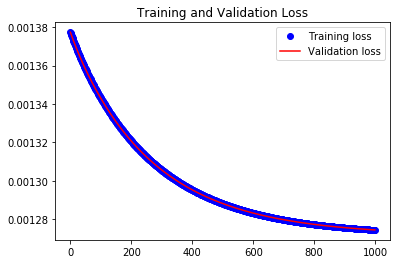

In [36]:
plot_loss(enc3, x_train, x_val, epochs3)

In [14]:
from keras.layers import Lambda

def less_basic_autoencoder(data):
    x_train = data
    # x_train = x_train.reshape((1, -1))
    x_train = x_train.transpose()  # transpose so that axis 0 is samples.
    
    inputLayer = Input(shape=(x_train.shape[1],))  # fixed

    l = inputLayer
    l = Dense(256, activation='relu')(l)
    l = Dense(128, activation='relu')(l)
    l = Dense(16, activation='relu')(l)
    l = Dense(8)(l)

    latent_space = l

    l2 = Dense(16, activation='relu')(l)
    l2 = Dense(128, activation='relu')(l2)
    l2 = Dense(256, activation='relu')(l2)
    l2 = Dense(1678, activation='linear')(l2)

    out_layer = l2
    
    auto_model = Model(input=inputLayer, output=[out_layer, latent_space])
    
    latent_input = Input(shape=(2,))
    decoder = functools.reduce(lambda x,y:y(x), decoder_layers, latent_input)
    inverse_model = Model(input=latent_input, output=decoder)
    
    auto_model.compile(loss=['mean_squared_error',tsne], optimizer='sgd')


In [15]:
less_basic_autoencoder(testmain)

c:\users\matej\envs\masters\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


NameError: name 'functools' is not defined